<a href="https://colab.research.google.com/github/negiamishhu/DL-and-ML-fusion-for-skin-disease-detection/blob/main/VGG16_RF_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-layer-normalization
!pip install keras

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=cd84f18b39d3f699c4763b5f2d1786ecd1a012fb83d412a36bd7e5376876ab08
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [ ]:
# prompt: gdrive mount code

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#from keras_layer_normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/train"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
train_images = []
train_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            #print(image_path)
            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                train_images.append(img)
                train_labels.append(folder)

train_images = np.array(train_images)
train_labels = np.array(train_labels)



print(train_labels)


['bkl' 'bkl' 'bkl' ... 'vasc' 'vasc' 'vasc']


In [ ]:
# Path to the directory containing folders of images
images_dir = "/content/drive/MyDrive/natural/test"

# Create lists to store image arrays (X) and labels (Y)
#SIZE = 128
SIZE = 224
test_images = []
test_labels = []

# Loop through each folder in the directory
for folder in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Check if the item in the folder is a file and is an image
            if os.path.isfile(image_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Read image as array
                img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (SIZE,SIZE))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                test_images.append(img)
                test_labels.append(folder)

test_images = np.array(test_images)
test_labels = np.array(test_labels)



print(test_labels)

['nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv'
 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'nv' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc'
 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'vasc' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel'
 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'mel' 'bcc' 'bcc' 'bcc'
 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'bcc' 'b

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network.
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

11/11 [==============================] - 225s 20s/step
Accuracy =  0.6971428571428572
              precision    recall  f1-score   support

       akiec       0.59      0.76      0.67        50
         bcc       0.65      0.72      0.69        50
         bkl       0.57      0.40      0.47        50
          df       0.94      1.00      0.97        50
         mel       0.53      0.50      0.52        50
          nv       0.74      0.50      0.60        50
        vasc       0.81      1.00      0.89        50

    accuracy                           0.70       350
   macro avg       0.69      0.70      0.69       350
weighted avg       0.69      0.70      0.69       350

[[38  4  4  1  2  0  1]
 [ 9 36  1  0  3  0  1]
 [ 8  5 20  0  7  8  2]
 [ 0  0  0 50  0  0  0]
 [ 9  5  7  0 25  1  3]
 [ 0  5  3  2 10 25  5]
 [ 0  0  0  0  0  0 50]]
1/1 [==============================] - 1s 946ms/step
The prediction for this image is:  ['bkl']
The actual label for this image is:  bkl


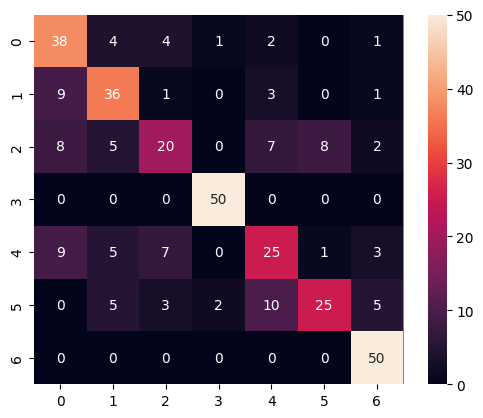

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
# Generate a classification report
report = classification_report(test_labels, prediction_RF)

print(report)
print(confusion_matrix(test_labels, prediction_RF))

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 1s 886ms/step
The prediction for this image is:  ['mel']
The actual label for this image is:  bkl


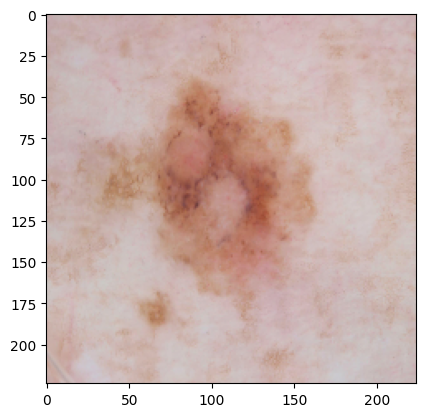

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

#vgg +XGBOOST CLASSIFIER (GRADIENT BOOST CLASSIFIER)

In [ ]:
#xgboost classifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.models import load_model
#RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
#RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
model_2 = XGBClassifier()
model_2.fit(X_for_RF, y_train)
#Now predict using the trained RF model.
prediction_RF = model_2.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))




11/11 [==============================] - 224s 20s/step
Accuracy =  0.7628571428571429


              precision    recall  f1-score   support

       akiec       0.72      0.76      0.74        50
         bcc       0.77      0.86      0.81        50
         bkl       0.68      0.50      0.57        50
          df       0.94      1.00      0.97        50
         mel       0.60      0.62      0.61        50
          nv       0.73      0.60      0.66        50
        vasc       0.86      1.00      0.93        50

    accuracy                           0.76       350
   macro avg       0.76      0.76      0.76       350
weighted avg       0.76      0.76      0.76       350

[[38  4  3  0  3  1  1]
 [ 1 43  3  0  1  0  2]
 [ 7  4 25  1  6  7  0]
 [ 0  0  0 50  0  0  0]
 [ 6  3  4  1 31  3  2]
 [ 1  2  2  1 11 30  3]
 [ 0  0  0  0  0  0 50]]
1/1 [==============================] - 1s 576ms/step
The prediction for this image is:  ['bcc']
The actual label for this image is:  bcc


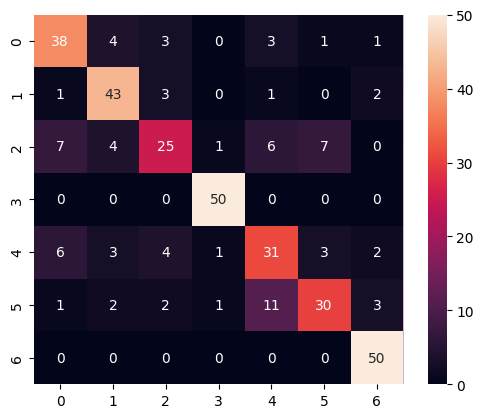

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
# Generate a classification report
report = classification_report(test_labels, prediction_RF)

print(report)
print(confusion_matrix(test_labels, prediction_RF))

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model_2.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 1s 545ms/step
The prediction for this image is:  ['df']
The actual label for this image is:  df


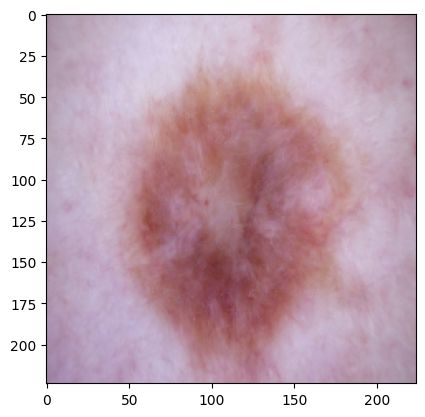

In [ ]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model_2.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])